## Defining ad-hoc scoring capabilities in Keras
### using a DOS attack file (label normal/attack)

In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # to disable GPU

import sys
import pandas as pd
import numpy as np

from keras import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt


    Three classical score Measures (f1, recall, precision)

In [14]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

    Model definition with non standard measures

In [8]:
def MLP_model():
   model = Sequential()
   model.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=122))
   model.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
   model.add(Dense(2, activation='sigmoid', kernel_initializer='random_normal'))
   model.compile(optimizer ='adam',loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
   return model

    Read and prepare data

In [11]:
data = pd.read_csv("./DAL_workshop_datasets/DoS_df.csv")
X_DoS = data.drop(columns='label')
y_DoS = data.label

y = np_utils.to_categorical(y_DoS) # t is categorical now
scaler = StandardScaler()
X = scaler.fit_transform(X_DoS)


X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.20, random_state=42)

    Fit and Score model

In [12]:
model = MLP_model()

# fit the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, verbose=1)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


2023-02-20 18:51:26.891712: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-20 18:51:26.891773: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: manero-ThinkPad-P52s
2023-02-20 18:51:26.891788: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: manero-ThinkPad-P52s
2023-02-20 18:51:26.891958: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.161.3
2023-02-20 18:51:26.892042: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.161.3
2023-02-20 18:51:26.892096: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 470.161.3
2023-02-20 18:51:26.893127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the fol

1983/1983 [==============================] - 5s 2ms/step - loss: 0.0214 - acc: 0.9945 - f1_m: 0.9944 - precision_m: 0.9946 - recall_m: 0.9941 - val_loss: 0.0064 - val_acc: 0.9989 - val_f1_m: 0.9989 - val_precision_m: 0.9989 - val_recall_m: 0.9989
Epoch 2/10
1983/1983 [==============================] - 4s 2ms/step - loss: 0.0057 - acc: 0.9987 - f1_m: 0.9987 - precision_m: 0.9987 - recall_m: 0.9987 - val_loss: 0.0031 - val_acc: 0.9992 - val_f1_m: 0.9992 - val_precision_m: 0.9992 - val_recall_m: 0.9993
Epoch 3/10
1983/1983 [==============================] - 4s 2ms/step - loss: 0.0049 - acc: 0.9988 - f1_m: 0.9988 - precision_m: 0.9988 - recall_m: 0.9988 - val_loss: 0.0023 - val_acc: 0.9995 - val_f1_m: 0.9995 - val_precision_m: 0.9995 - val_recall_m: 0.9995
Epoch 4/10
1983/1983 [==============================] - 4s 2ms/step - loss: 0.0027 - acc: 0.9991 - f1_m: 0.9991 - precision_m: 0.9991 - recall_m: 0.9991 - val_loss: 0.0026 - val_acc: 0.9992 - val_f1_m: 0.9992 - val_precision_m: 0.9992 - 

In [21]:
history.history

{'loss': [0.02137228660285473,
  0.005703735630959272,
  0.004907746333628893,
  0.0027046739123761654,
  0.0026486513670533895,
  0.0018155121942982078,
  0.0021157804876565933,
  0.0021465655881911516,
  0.0014833132736384869,
  0.0014722500927746296],
 'acc': [0.9944822192192078,
  0.9987072348594666,
  0.9988333582878113,
  0.99906986951828,
  0.9991171360015869,
  0.9993693828582764,
  0.9992432594299316,
  0.9993851780891418,
  0.9993693828582764,
  0.9993851780891418],
 'f1_m': [0.9943701028823853,
  0.9986845254898071,
  0.9988105893135071,
  0.9990779757499695,
  0.9991252422332764,
  0.9993616342544556,
  0.9992358088493347,
  0.9994011521339417,
  0.9993776679039001,
  0.9993776679039001],
 'precision_m': [0.9946318864822388,
  0.998661994934082,
  0.9987885355949402,
  0.9990859627723694,
  0.9991332292556763,
  0.9993696212768555,
  0.999228298664093,
  0.9994016289710999,
  0.9993701577186584,
  0.9993701577186584],
 'recall_m': [0.9941376447677612,
  0.9987077713012695,


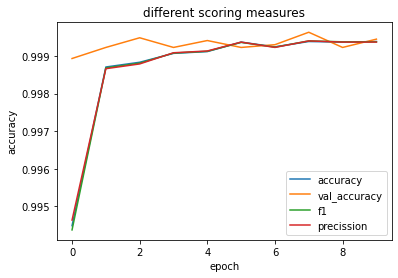

In [29]:
   plt.plot(history.history['acc'],label='accuracy')
   plt.plot(history.history['val_acc'],label='val_accuracy')
   plt.plot(history.history['f1_m'], label='f1')
   plt.plot(history.history['precision_m'], label='precission')
   plt.title('different scoring measures')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend()
   plt.show()

In [ ]:
#EOF